In [2]:
import marvelous

# Your own config file to keep your private key local and secret
public_key = '1f903fde09e78b25f944e1f0cccb0015'
private_key = '1ca25fd15a05c2b52e7e2700ce1820263eb10e78'
comics_list =[]

# Authenticate with Marvel, with keys I got from http://developer.marvel.com/
m = marvelous.api(public_key, private_key)

# Get all comics from this week, sorted alphabetically by title
pulls = sorted(m.comics({
    'format': "comic",
    'formatType': "comic",
    'noVariants': True,
    'dateDescriptor': "thisWeek",
    'limit': 100}),
    key=lambda comic: comic.title)

pulls1 = sorted(m.comics({
    'dateDescriptor': "thisMonth",
    #'characterList':True,
    'limit': 100}),
    key=lambda comic: comic.title)

for comic in pulls1:
    # Write a line to the file with the name of the issue, and the
    # id of the series
    print('{} (series #{})'.format(comic.title, comic.series.id))

ABSOLUTE CARNAGE: SEPARATION ANXIETY 1 (2019) #1 (series #27636)
AGE OF X-MAN: NEXTGEN TPB (Trade Paperback) (series #26372)
AGE OF X-MAN: THE AMAZING NIGHTCRAWLER TPB (Trade Paperback) (series #26373)
AGE OF X-MAN: THE MARVELOUS X-MEN TPB (Trade Paperback) (series #26371)
AGE OF X-MAN: X-TREMISTS TPB (Trade Paperback) (series #26374)
AMAZING SPIDER-MAN: VENOM 3D 1 (2019) #1 (series #27913)
ASGARDIANS OF THE GALAXY VOL. 2: WAR OF THE REALMS TPB (Trade Paperback) (series #26672)
Absolute Carnage (2019) #1 (Variant) (series #27272)
Absolute Carnage (2019) #2 (series #27272)
Absolute Carnage Vs. Deadpool (2019) #1 (series #27720)
Absolute Carnage: Lethal Protectors (2019) #1 (series #27633)
Absolute Carnage: Miles Morales (2019) #1 (series #27634)
Absolute Carnage: Scream (2019) #1 (series #27635)
Age of Conan: Valeria (2019) #1 (series #27222)
Agents of Atlas (2019) #1 (Variant) (series #27624)
Avengers (2018) #23 (series #24229)
Black Panther (2018) #15 (series #24291)
CAPTAIN MARVEL VO

In [3]:
for comic in pulls:
    # Write a line to the file with the name of the issue, and the
    # id of the series
    print('{} (series #{})'.format(comic.dates, comic.series.id))

<marvelous.dates.Dates object at 0x0000028AD95AF1D0> (series #27272)
<marvelous.dates.Dates object at 0x0000028AD95AF550> (series #27979)
<marvelous.dates.Dates object at 0x0000028AD959C7B8> (series #27392)
<marvelous.dates.Dates object at 0x0000028AD95AF358> (series #27624)
<marvelous.dates.Dates object at 0x0000028AD959CA58> (series #27314)
<marvelous.dates.Dates object at 0x0000028AD9522978> (series #26592)
<marvelous.dates.Dates object at 0x0000028AD959CC18> (series #26922)
<marvelous.dates.Dates object at 0x0000028AD959C588> (series #26080)
<marvelous.dates.Dates object at 0x0000028AD95AF048> (series #25987)
<marvelous.dates.Dates object at 0x0000028AD959C898> (series #27824)
<marvelous.dates.Dates object at 0x0000028AD959C630> (series #26338)
<marvelous.dates.Dates object at 0x0000028AD95AF278> (series #24278)
<marvelous.dates.Dates object at 0x0000028AD959C978> (series #26683)
<marvelous.dates.Dates object at 0x0000028AD95AF128> (series #26892)
<marvelous.dates.Dates object at 0

In [4]:
import pandas as pd
df = pd.DataFrame()

In [42]:

for comic, i in zip(pulls1,range(0,len(pulls1))):
    df.loc[i,'dates'] = comic.dates.on_sale
    df.loc[i,'diamond_code'] = comic.diamond_code
    df.loc[i,'format'] = comic.format
    df.loc[i,'page_count'] = comic.page_count
    df.loc[i,'series_id'] = comic.series.id
    df.loc[i,'title'] = comic.title


In [43]:
df

,dates,diamond_code,page_count,series_id,title,Comic,Digital Comic,Hardcover,Poster Book,Trade Paperback,format
0,2019-08-14,JUN190809,40.0,27636.0,ABSOLUTE CARNAGE: SEPARATION ANXIETY 1 (2019) #1,1,0,0,0,0,Comic
1,2019-08-21,MAY190972,112.0,26372.0,AGE OF X-MAN: NEXTGEN TPB (Trade Paperback),0,0,0,0,1,Trade Paperback
2,2019-08-28,JUN191062,112.0,26373.0,AGE OF X-MAN: THE AMAZING NIGHTCRAWLER TPB (Tr...,0,0,0,0,1,Trade Paperback
3,2019-08-21,MAY190971,192.0,26371.0,AGE OF X-MAN: THE MARVELOUS X-MEN TPB (Trade P...,0,0,0,0,1,Trade Paperback
4,2019-08-28,JUN191060,112.0,26374.0,AGE OF X-MAN: X-TREMISTS TPB (Trade Paperback),0,0,0,0,1,Trade Paperback
5,2019-08-28,JUN190931,48.0,27913.0,AMAZING SPIDER-MAN: VENOM 3D 1 (2019) #1,1,0,0,0,0,Comic
6,2019-08-14,MAY190961,112.0,26672.0,ASGARDIANS OF THE GALAXY VOL. 2: WAR OF THE RE...,0,0,0,0,1,Trade Paperback
7,2019-08-07,JUN190773,72.0,27272.0,Absolute Carnage (2019) #1 (Variant),1,0,0,0,0,Comic
8,2019-08-28,JUN190775,40.0,27272.0,Absolute Carnage (2019) #2,1,0,0,0,0,Comic
9,2019-08-21,JUN190786,32.0,27720.0,Absolute Carnage Vs. Deadpool (2019) #1,1,0,0,0,0,Comic


In [7]:
import matplotlib.pyplot as plt
df.groupby('dates').page_count.hist()
plt.legend(list(df.groupby('dates').groups.keys()))
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
df1 = pd.get_dummies(df['format'])

In [12]:
df = pd.concat([df,df1],axis =1)

In [13]:
df.head()

,dates,diamond_code,page_count,series_id,title,Comic,Digital Comic,Hardcover,Poster Book,Trade Paperback
0,2019-08-14,JUN190809,40.0,27636.0,ABSOLUTE CARNAGE: SEPARATION ANXIETY 1 (2019) #1,1,0,0,0,0
1,2019-08-21,MAY190972,112.0,26372.0,AGE OF X-MAN: NEXTGEN TPB (Trade Paperback),0,0,0,0,1
2,2019-08-28,JUN191062,112.0,26373.0,AGE OF X-MAN: THE AMAZING NIGHTCRAWLER TPB (Tr...,0,0,0,0,1
3,2019-08-21,MAY190971,192.0,26371.0,AGE OF X-MAN: THE MARVELOUS X-MEN TPB (Trade P...,0,0,0,0,1
4,2019-08-28,JUN191060,112.0,26374.0,AGE OF X-MAN: X-TREMISTS TPB (Trade Paperback),0,0,0,0,1


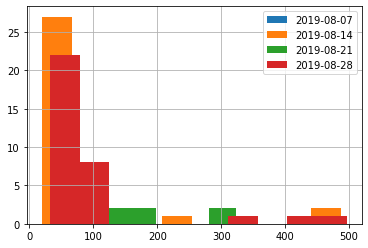

In [24]:
import matplotlib.pyplot as plt
df.groupby('dates').page_count.hist()
plt.legend(list(df.groupby('dates').groups.keys()))
plt.show()

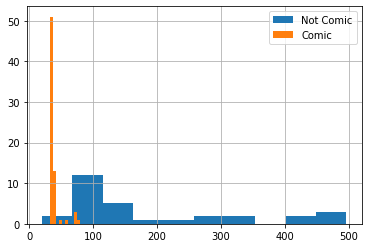

In [14]:
df.groupby('Comic').page_count.hist()
plt.legend(['Not Comic','Comic'])
plt.show()

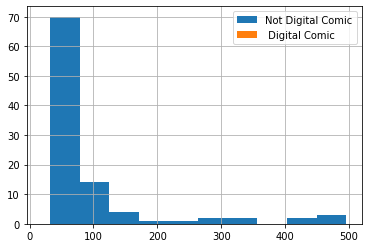

In [15]:
df.groupby('Digital Comic').page_count.hist()
plt.legend(['Not Digital Comic',' Digital Comic'])
plt.show()

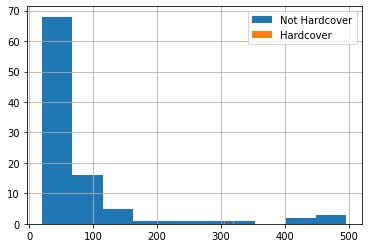

In [16]:
df.groupby('Hardcover').page_count.hist()
plt.legend(['Not Hardcover','Hardcover'])

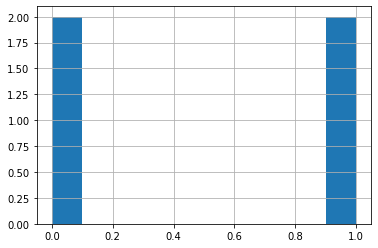

In [27]:
df.groupby('dates').Hardcover.sum().hist()

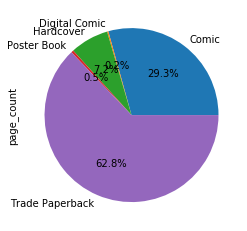

In [55]:
df.groupby('format').page_count.sum().plot.pie(autopct='%1.1f%%')
plt.show()

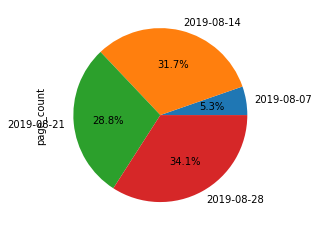

In [54]:
df.groupby('dates').page_count.sum().plot.pie(autopct='%1.1f%%')
plt.show()